In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
# BLUE_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_Blue_R2300.h5"
# NIR_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_NIR_R4300.h5"
sys.path.insert(0, PROJECT_PATH)

In [6]:
# from lv.util import Util as u

In [136]:
# DATA_PATH = "/scratch/ceph/swei20/data/pfsspec/train/pfs_stellar_model/dataset/BHB/bosz_5000_RedM_10k/dataset.h5"

In [6]:
from lv.pca.basePCA import BasePCA

In [11]:
p = BasePCA()

# BHB flux: (1000, 204), wave RML: (204,) 


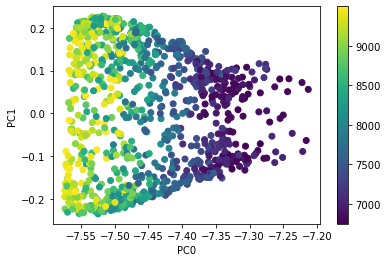

In [17]:
W="RML"
R="B"
N=1000
v = p.run_R(W,R, N=N, top=100, transform=1, save=0)

In [18]:
p.run(W, N=10000, top=100, transform=0, save=1)

# M31G flux: (10000, 204), wave RML: (204,) 
# MWW flux: (10000, 204), wave RML: (204,) 
# MWC flux: (10000, 204), wave RML: (204,) 
# BHB flux: (10000, 204), wave RML: (204,) 
# RHB flux: (10000, 204), wave RML: (204,) 
# DGG flux: (10000, 204), wave RML: (204,) 
/scratch/ceph/swei20/data/dnn/PC/logPC/RML_R1000.h5


In [15]:
p.pcFlux

(100, 204)

In [154]:
v = p.get_PC_R(R,N=10000,step=20,transform=1)

#204 R=929.31
# BHB flux: (10000, 204), wave [7100, 8850, 5000, 'RedM']: (204,) 


In [155]:
p.collect_PC_R(R, name="_step20")

/scratch/ceph/swei20/data/dnn/PC/logPC/bosz_RedM_R5000_step20.h5


In [157]:
v.shape

(100, 204)

In [161]:
p.npcFlux["B"].shape

(10000, 100)

In [139]:
_,flux,_,para,dfsnr = p.load_dataset(DATA_PATH)

In [141]:
flux.shape

(10000, 4096)

In [142]:
dfparams = pd.read_hdf(DATA_PATH, "params")  

In [143]:
dfparams

,id,redshift,redshift_err,exp_count,exp_time,extinction,target_zenith_angle,target_field_angle,moon_zenith_angle,moon_target_angle,...,Fe_H,Fe_H_err,a_Fe,a_Fe_err,N_He,v_turb,L_H,C_M,O_M,interp_param
0,0,0.000434,0.0,20,900.0,NaN,0.301017,0.595610,47.923211,60.194913,...,-2.208706,NaN,NaN,NaN,NaN,NaN,NaN,0.491068,0.030136,
1,1,-0.000905,0.0,20,900.0,NaN,16.266523,0.572692,66.763422,108.456174,...,-2.482511,NaN,NaN,NaN,NaN,NaN,NaN,0.266252,-0.050814,
2,2,0.002083,0.0,20,900.0,NaN,19.460750,0.478682,87.432331,177.090780,...,-1.628428,NaN,NaN,NaN,NaN,NaN,NaN,0.228358,0.118606,
3,3,-0.000222,0.0,20,900.0,NaN,17.476681,0.214435,51.571499,175.771407,...,-1.572902,NaN,NaN,NaN,NaN,NaN,NaN,0.359110,-0.040620,
4,4,0.000011,0.0,20,900.0,NaN,44.787907,0.037443,75.085548,75.627337,...,-1.515580,NaN,NaN,NaN,NaN,NaN,NaN,-0.711799,-0.011313,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.002317,0.0,20,900.0,NaN,22.643155,0.570707,80.379930,101.397678,...,-1.791093,NaN,NaN,NaN,NaN,NaN,NaN,0.494332,-0.050392,
3996,3996,-0.000934,0.0,20,900.0,NaN,38.180605,0.071097,42.353246,171.811945,...,-1.936420,NaN,NaN,NaN,NaN,NaN,NaN,0.449970,0.494318,
3997,3997,0.000098,0.0,20,900.0,NaN,36.709810,0.315307,39.208459,107.214554,...,-1.560369,NaN,NaN,NaN,NaN,NaN,NaN,-0.350308,0.107234,
3998,3998,-0.000412,0.0,20,900.0,NaN,33.996713,0.393861,31.893556,117.784251,...,-2.149817,NaN,NaN,NaN,NaN,NaN,NaN,-0.741500,0.498709,


In [138]:
para.shape

(4000, 5)

In [128]:
para = p.nPara[R]

In [132]:
para

array([[-2.20870584e+00,  7.83524256e+03,  2.43687704e+00,
         4.91068016e-01,  3.01356277e-02],
       [-2.48251060e+00,  9.00217665e+03,  3.33388458e+00,
         2.66252225e-01, -5.08142292e-02],
       [-1.62842824e+00,  6.83468994e+03,  2.42825732e+00,
         2.28357522e-01,  1.18606226e-01],
       ...,
       [-1.56036905e+00,  6.85384595e+03,  2.33384896e+00,
        -3.50308199e-01,  1.07233880e-01],
       [-2.14981741e+00,  9.01088071e+03,  3.31495604e+00,
        -7.41500138e-01,  4.98709317e-01],
       [-2.42005547e+00,  7.60077561e+03,  2.12605525e+00,
         4.66245618e-01,  2.87479288e-01]])

In [70]:
# p.get_PC(N=1000, step=20)

In [85]:
data=p.nFlux["B"]

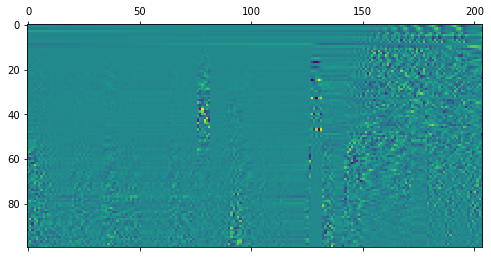

In [93]:
plt.matshow(v, aspect="auto")

In [149]:
data = p.npcFlux[R]
para = p.nPara[R]

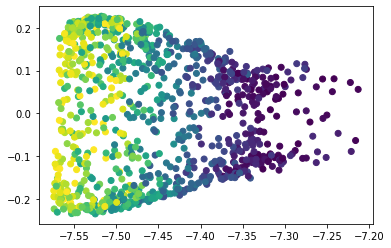

In [151]:
plt.scatter(data[:,0], data[:,1], c=para[:,1])

In [68]:
v.shape

(100, 204)

In [ ]:
plt.plot()

In [51]:
R="B"
p.prepare_dataset_R_W(R, N=1000, W="RedM", step=20)

#204 R=929.31
# BHB flux: (1000, 204), wave RedM: (204,) 


In [54]:
p.prepare_svd_R(R, top=100)

In [ ]:
p.collect_PC_R(R, )

In [55]:
p.nVs[R].shape

(100, 204)

In [11]:
wave, flux, err, dfsnr, dfpara= p.load_dataset(DATA_PATH)

In [22]:
wL,fL,eL = p.resample(wave, flux, err=err, step=20)

#204 R=929.31


In [23]:
fL.shape

(1000, 204)

In [108]:
waveRML = p.get_PC(wave, flux, para, top=100, save=0)

In [114]:
from lv.util import Util as u
from lv.constants import Constants as c

In [113]:
p.dfpara

AttributeError: 'PCA' object has no attribute 'dfpara'

In [115]:
dfpara = pd.DataFrame(para, columns = c.Pnms)

In [116]:
u.get_para_index([-2.0, 8250, 2.5, 0.0,0.25], dfpara)

Int64Index([20353], dtype='int64')

(7100.0, 8850.0)

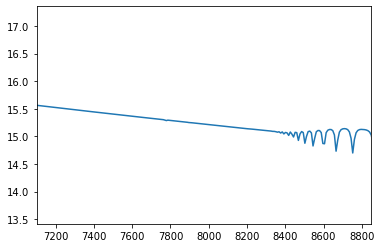

In [118]:
plt.plot(wave, flux[20353])
plt.xlim(7100, 8850)

In [100]:

v = p.nVs["B"]
v.shape

(100, 221)

AttributeError: 'PCA' object has no attribute 'get_wave_axis'

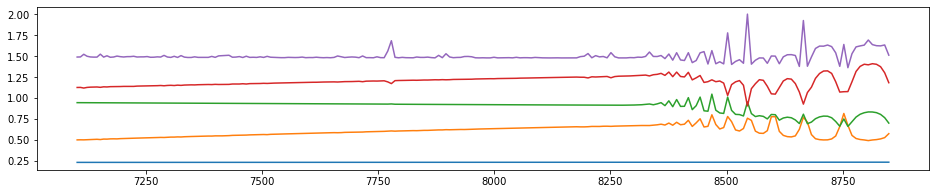

In [110]:
p.plot_V(waveRML, v)

In [38]:
SAVE_PATH = "/scratch/ceph/swei20/data/pfsspec/import/stellar/grid/bosz_R10000/logflux.h5"

In [34]:
SAVE_PATH_R1k = "/scratch/ceph/swei20/data/pfsspec/import/stellar/grid/bosz_R1000/logflux.h5"

In [36]:
save(waveL, logfluxL, para, SAVE_PATH_R1k)

In [40]:
save(wave, logflux, para, SAVE_PATH)

In [33]:
def save(wave, flux, para, SAVE_PATH):
    with h5py.File(SAVE_PATH, "w") as f:
        f.create_dataset(f"flux", data=flux, shape=flux.shape)
        f.create_dataset(f"para", data=para, shape=para.shape)
        f.create_dataset(f"wave", data=wave, shape=wave.shape)    

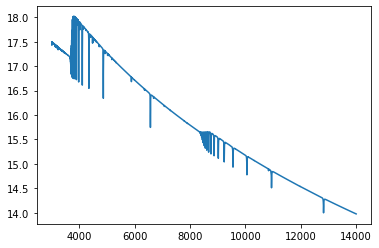

In [20]:
plt.plot(wave, logflux[22032])

In [ ]:
    para = f['para'][()]

In [12]:
para.shape

(116614, 5)

In [9]:
DATA_PATH = f"/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_50000/spectra.h5"
with h5py.File(DATA_PATH, 'r') as f:
#     flux = f['flux'][()]
#     para = f['para'][()]
    wave = f['wave'][()]

# RML

In [437]:
W="RML"

In [438]:
DATA_PATH = f"/scratch/ceph/szalay/swei20/AE/norm_flux_{W}_R1000.h5"
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]
    wave = f['wave'][()]

In [439]:
p = PCA()
p.prepare_data(flux, wave, para, W=W)
p.prepare_svd(top=50, save=1)

# M flux: 6155, wave RML: (221,) 
# W flux: 6480, wave RML: (221,) 
# C flux: 5748, wave RML: (221,) 
# B flux: 4800, wave RML: (221,) 
# R flux: 2400, wave RML: (221,) 
# G flux: 4900, wave RML: (221,) 


100%|██████████| 6/6 [00:00<00:00, 19.34it/s]

/scratch/ceph/swei20/data/dnn/PC/bosz_RML_R1000.h5


# BL

In [440]:
W="BL"

In [441]:
DATA_PATH = f"/scratch/ceph/szalay/swei20/AE/norm_flux_{W}_R1000.h5"
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]
    wave = f['wave'][()]

In [442]:
p = PCA()
p.prepare_data(flux, wave, para, W=W)
p.prepare_svd(top=50, save=1)

# M flux: 6155, wave BL: (537,) 
# W flux: 6480, wave BL: (537,) 
# C flux: 5748, wave BL: (537,) 
# B flux: 4800, wave BL: (537,) 
# R flux: 2400, wave BL: (537,) 
# G flux: 4900, wave BL: (537,) 


100%|██████████| 6/6 [00:01<00:00,  5.15it/s]

/scratch/ceph/swei20/data/dnn/PC/bosz_BL_R1000.h5


# NL

In [443]:
W="NL"

In [444]:
DATA_PATH = f"/scratch/ceph/szalay/swei20/AE/norm_flux_{W}_R1000.h5"
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]
    wave = f['wave'][()]

In [445]:
p = PCA()
p.prepare_data(flux, wave, para, W=W)
p.prepare_svd(top=50, save=1)

  0%|          | 0/6 [00:00<?, ?it/s]

# M flux: 6155, wave NL: (293,) 
# W flux: 6480, wave NL: (293,) 
# C flux: 5748, wave NL: (293,) 
# B flux: 4800, wave NL: (293,) 
# R flux: 2400, wave NL: (293,) 
# G flux: 4900, wave NL: (293,) 


100%|██████████| 6/6 [00:00<00:00, 11.73it/s]

/scratch/ceph/swei20/data/dnn/PC/bosz_NL_R1000.h5


In [ ]:
p.prepare_rf(cut=12)

(2100, 50) (2100, 5)


KeyboardInterrupt: 

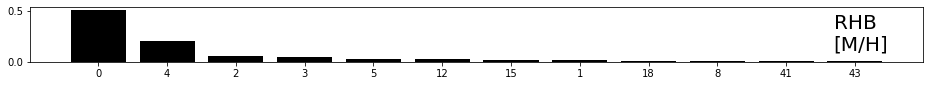

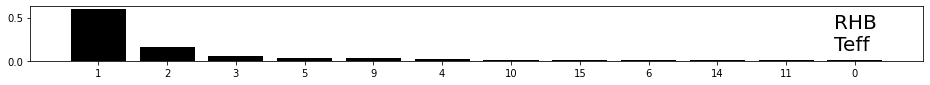

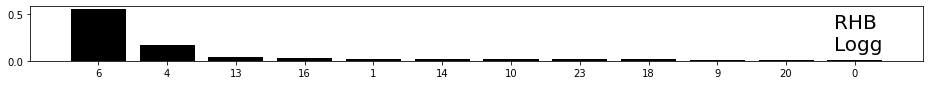

In [341]:
p.get_rfdx(Rgn)

(0.0, 0.05)

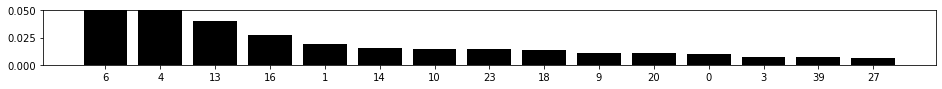

In [335]:
p.barplot_rf(fi)
plt.ylim(0,0.05)

In [338]:
20//3

6

In [313]:
dfc = pd.DataFrame(data=p.nPara[Rgn], columns=p.pnames)

In [314]:
for i in range(12):
    dfc[f"p{i}"] = pcFluxRF[:, i]

In [316]:
dfc

,[M/H],Teff,Logg,[C/M],[a/M],p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,-1.0,5000.0,2.0,-0.50,-0.25,-0.404217,-0.015937,0.054726,0.055777,-0.004807,-0.002562,0.008045,0.008262,0.000742,-0.000907,0.001662,0.002563
1,-1.0,5000.0,2.0,-0.50,0.00,-0.473433,-0.006700,0.077114,0.049359,0.003200,-0.003293,0.005568,0.007160,-0.000117,-0.000914,0.003068,0.002430
2,-1.0,5000.0,2.0,-0.50,0.25,-0.548182,-0.000005,0.097780,0.036600,0.011233,-0.006262,0.003368,0.006400,-0.001589,-0.001030,0.003631,0.002033
3,-1.0,5000.0,2.0,-0.50,0.50,-0.625410,0.002846,0.115734,0.017590,0.018610,-0.010965,0.000551,0.005345,-0.002272,-0.002243,0.003377,0.001602
4,-1.0,5000.0,2.0,-0.25,-0.25,-0.406926,-0.019078,0.052125,0.056266,-0.002374,-0.001414,0.007321,0.007890,0.000993,-0.001224,0.001309,0.002295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.0,6500.0,3.0,0.25,0.50,-0.907977,0.088605,-0.056738,-0.069789,-0.028566,0.031169,-0.041495,0.013847,0.003614,-0.001729,0.003035,0.003521
2096,0.0,6500.0,3.0,0.50,-0.25,-0.608065,0.086334,-0.121500,0.013449,-0.052026,0.034012,-0.009811,-0.000339,-0.004421,-0.000014,0.003477,-0.001197
2097,0.0,6500.0,3.0,0.50,0.00,-0.690232,0.089961,-0.100994,-0.001206,-0.045151,0.038716,-0.018082,0.002108,-0.001503,-0.000486,0.003627,-0.000054
2098,0.0,6500.0,3.0,0.50,0.25,-0.791572,0.090561,-0.081622,-0.027977,-0.038482,0.041936,-0.028545,0.006681,0.000985,-0.000564,0.004213,0.001917


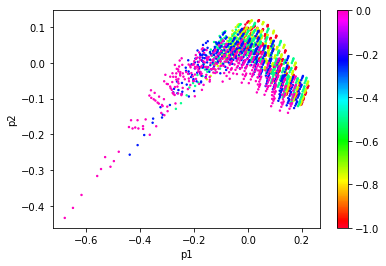

In [324]:
idx, a,b = 0, "p1", "p2"

plt.scatter(dfc[a], dfc[b], c=dfc[p.pnames[idx]].values, cmap=p.color[idx],s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

In [99]:
from lv.base.dataloader_c import DataLoader

In [100]:
ds = DataLoader()

In [101]:
ds.prepare_data_custom("RMLL", fluxsL, waveMRL, pvals, lbl=lbln)

(50000, 220) (220,) (50000, 5)


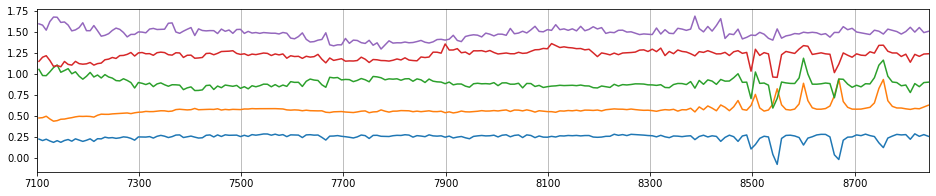

In [102]:
ds.init_pca()

# Get informative lines

In [105]:
ds.npcaFlux.shape

(50000, 50)

In [109]:
Tfi = ds.get_rf(ds.npcaFlux, ds.para[:, 1])

In [110]:
Lfi = ds.get_rf(ds.npcaFlux, ds.para[:, 2])

In [117]:
Ffi = ds.get_rf(ds.npcaFlux, ds.para[:, 0])

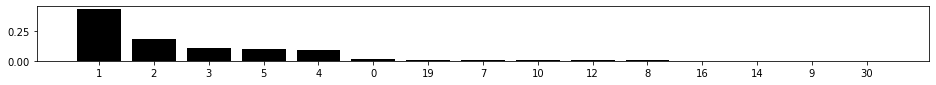

In [188]:
ds.barplot_rf(Tfi)
# plt.ylim(0,0.02)

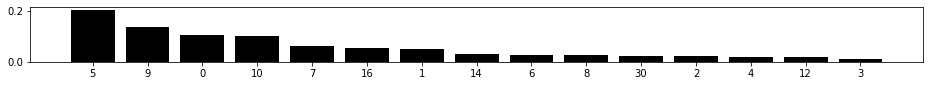

In [189]:
ds.barplot_rf(Lfi)
# plt.ylim(0,0.02)

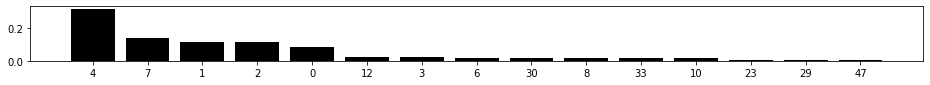

In [190]:
ds.barplot_rf(Ffi)
# plt.ylim(0,0.02)

In [227]:
from lv.constants import Constants as c

In [228]:
c.Ws

{'Blue': [3800, 6500, 2300],
 'RedL': [6300, 9700, 3000],
 'RedM': [7100, 8850, 5000],
 'NIR': [9400, 12600, 4300],
 'BL': [3800, 6500, 1000],
 'RML': [7100, 8850, 1000],
 'NL': [9400, 12600, 1000]}

In [132]:
rfdx = [1,2,3,5,4,0,9,10,7,16,14,6,8,30,19,12]

In [133]:
len(rfdx)

16

In [170]:
dfc = np.copy(ds.dfpara)

In [173]:
dfc[:,:3]

array([[-2.18132136e+00,  4.24150525e+03,  1.91449020e+00],
       [-1.04857990e+00,  3.78831545e+03,  6.37767527e-02],
       [-8.94329601e-01,  4.07415664e+03,  5.32601149e-01],
       ...,
       [-3.37862595e-01,  5.21037768e+03,  2.05732380e+00],
       [-3.31924374e-03,  5.64819280e+03,  2.60992719e+00],
       [-7.05458665e-01,  5.88863950e+03,  2.27976212e+00]])

In [174]:
dfc = pd.DataFrame(dfc[:,:3], columns=["F","T","L"])

In [176]:
dfc

,F,T,L
0,-2.181321,4241.505253,1.914490
1,-1.048580,3788.315452,0.063777
2,-0.894330,4074.156645,0.532601
3,-1.369839,3756.060329,0.479334
4,-2.207059,4486.324792,0.368539
...,...,...,...
49995,-0.906073,5147.447645,2.340813
49996,-0.076290,5079.817543,2.920920
49997,-0.337863,5210.377676,2.057324
49998,-0.003319,5648.192797,2.609927


In [177]:
for dx in rfdx:
    dfc[f"p{dx}"] = ds.npcaFlux[:,dx]

In [178]:
dfc

,F,T,L,p1,p2,p3,p5,p4,p0,p9,p10,p7,p16,p14,p6,p8,p30,p19,p12
0,-2.181321,4241.505253,1.914490,0.043723,-0.086897,-0.087617,0.007957,0.000999,-0.188692,0.001010,0.012771,-0.031451,0.002137,0.006220,-0.010772,0.007168,-0.002217,0.008758,-0.015656
1,-1.048580,3788.315452,0.063777,-0.092076,-0.203287,-0.168321,-0.050151,0.105644,-0.931472,0.005193,0.053459,0.010931,0.008799,-0.016493,0.016360,0.063038,0.000511,-0.003405,0.015539
2,-0.894330,4074.156645,0.532601,-0.057969,-0.207826,-0.074044,-0.046355,0.060837,-0.714386,-0.025163,0.025143,0.001094,0.001597,-0.001092,0.062196,0.016905,-0.000323,0.006861,0.017006
3,-1.369839,3756.060329,0.479334,-0.462788,-0.202974,0.457372,-0.047843,0.078887,-1.108656,-0.086412,-0.026832,-0.090700,0.005734,-0.000724,-0.017204,-0.012414,0.002194,0.005018,0.026906
4,-2.207059,4486.324792,0.368539,0.087344,-0.109296,-0.102598,-0.009437,-0.001093,-0.237538,0.010106,0.011635,-0.036509,0.005719,-0.002314,-0.046496,0.012951,-0.003956,-0.001984,-0.002720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.906073,5147.447645,2.340813,0.075827,-0.141019,-0.099213,0.001091,-0.012149,-0.411787,-0.001504,0.002207,-0.012741,0.002799,-0.003695,-0.016634,-0.009288,0.000376,-0.005029,0.001328
49996,-0.076290,5079.817543,2.920920,-0.060370,-0.172913,-0.020097,-0.002386,-0.002030,-0.647319,-0.019297,-0.005063,0.038452,-0.001226,-0.000743,0.086979,-0.039427,0.000231,0.003338,-0.010799
49997,-0.337863,5210.377676,2.057324,0.074859,-0.220080,-0.123009,-0.001686,-0.030628,-0.723232,-0.009446,-0.004998,0.029483,0.000555,0.005011,-0.018241,-0.003568,0.000931,-0.002525,0.007191
49998,-0.003319,5648.192797,2.609927,0.078279,-0.146982,-0.085988,0.017816,-0.027668,-0.604602,-0.014179,0.008166,0.039607,-0.002373,0.002529,0.029343,-0.038050,-0.000156,0.001004,-0.004757


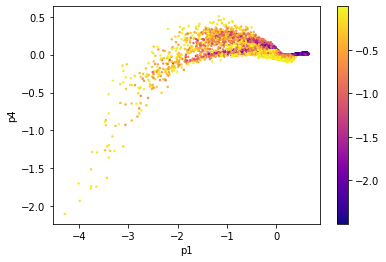

In [221]:
a,b = "p1", "p4"
plt.scatter(dfc[a], dfc[b], c=dfc["F"].values, cmap="plasma",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

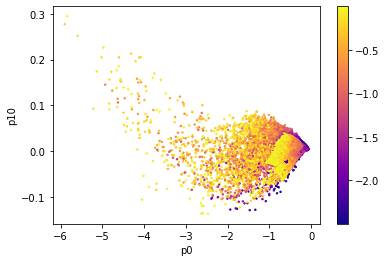

In [214]:
a,b = "p0", "p10"
plt.scatter(dfc[a], dfc[b], c=dfc["F"].values, cmap="plasma",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

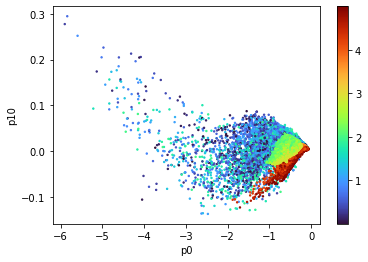

In [213]:
a,b = "p0", "p10"
plt.scatter(dfc[a], dfc[b], c=dfc["L"].values, cmap="turbo",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

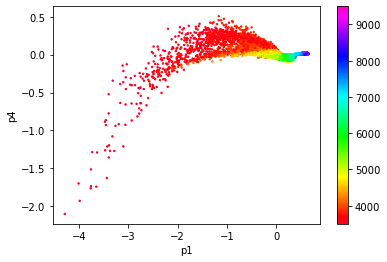

In [195]:
a,b = "p1", "p4"
plt.scatter(dfc[a], dfc[b], c=dfc["T"].values, cmap="gist_rainbow",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

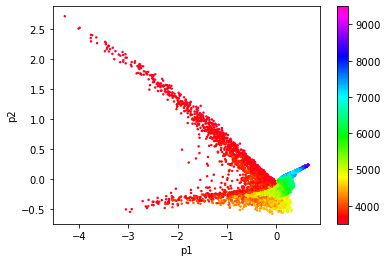

In [187]:
a,b = "p1", "p2"
plt.scatter(dfc[a], dfc[b], c=dfc["T"].values, cmap="gist_rainbow",s=2)
plt.xlabel(a)
plt.ylabel(b)
plt.colorbar()

/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/datascope/slurm/minicond

KeyboardInterrupt: 

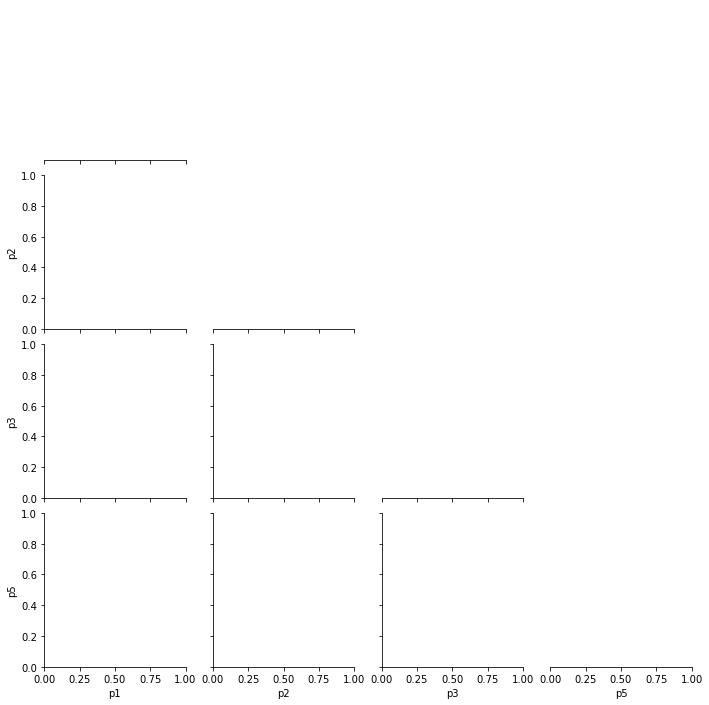

In [181]:
sns.pairplot(dfc,
    x_vars=["p1","p2","p3","p5"],
    y_vars=["p1","p2","p3","p5"],
    hue="T",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="gist_rainbow",
    corner=True)

In [134]:
FluxC = ds.npcaFlux[:, rfdx]

In [135]:
FluxC.shape

(50000, 16)

In [139]:
ds.para.shape

(50000, 5)

In [ ]:
w="R"

In [143]:
ds.dfpara.describe()

,F,T,L,C,O
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-1.150155,6000.983035,2.947381,-0.124016,0.125639
std,0.711340,1444.441913,1.347229,0.358663,0.215864
min,-2.499925,3500.010426,0.000149,-0.749866,-0.249938
25%,-1.765675,4938.692823,2.123002,-0.433585,-0.060618
50%,-1.073839,5775.406535,2.746480,-0.124618,0.125388
75%,-0.526596,6999.771019,4.247523,0.184885,0.311794
max,-0.000140,9499.984383,4.999823,0.499822,0.499889


In [145]:
bnds=np.array([[-2.5,0.],[3500,9500], [0,5],[-0.75, 0.5],[-0.25, 0.5]])

In [160]:
np.diff(bnds).T[0]

array([2.50e+00, 6.00e+03, 5.00e+00, 1.25e+00, 7.50e-01])

In [165]:
ds.normpara = np.divide((ds.para- bnds[:,0] ), np.diff(bnds).T[0])

In [167]:
def save_PCA(flux, pval, pnorm, w, PATH):
    with h5py.File(PATH, 'w') as f:
        f.create_dataset(f'flux{w}', data = flux, shape=flux.shape)
        f.create_dataset('pval', data = pval, shape=pval.shape)
        f.create_dataset('pnorm', data = pnorm, shape=pnorm.shape)


In [169]:
PATH = "/scratch/ceph/swei20/data/dnn/LL/pca_5k.h5"

In [222]:
save_PCA(FluxC, ds.para, ds.normpara, "R", PATH)